<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data" data-toc-modified-id="Data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data</a></span></li></ul></div>

## Data

In [1]:
from mantisshrimp.all import *
import pandas as pd

In [2]:
source = Path('/home/lgvaz/.data/wheat')

In [3]:
df = pd.read_csv(source/'train.csv')
df.head()

,image_id,width,height,bbox,source
0,b6ab77fd7,1024,1024,"[834.0, 222.0, 56.0, 36.0]",usask_1
1,b6ab77fd7,1024,1024,"[226.0, 548.0, 130.0, 58.0]",usask_1
2,b6ab77fd7,1024,1024,"[377.0, 504.0, 74.0, 160.0]",usask_1
3,b6ab77fd7,1024,1024,"[834.0, 95.0, 109.0, 107.0]",usask_1
4,b6ab77fd7,1024,1024,"[26.0, 144.0, 124.0, 117.0]",usask_1


In [4]:
class WheatInfoParser(ImageParser):
    def __iter__(self): yield from df.itertuples()
    def iid(self, o): return int(o.image_id, 16)
    def file_path(self, o): return self.source/f'train/{o.image_id}.jpg'
    def height(self, o): return o.height
    def width(self, o): return o.width

In [5]:
class WheatAnnotationParser(AnnotationParser):
    def __iter__(self): yield from df.itertuples()
    def iid(self, o): return int(o.image_id, 16)
    def oid(self, o): return 1
    def bbox(self, o): return BBox.from_xywh(*np.fromstring(o.bbox[1:-1], sep=','))

In [6]:
class WheatParser(DataParser):
    def get_img_parser(self, o, source): return WheatInfoParser(o, source)
    def get_annot_parser(self, o, source): return WheatAnnotationParser(o, source)

In [7]:
parser = WheatParser(df, source)

In [8]:
rtrain,rvalid = parser.parse()


Removed 0 images that don't have annotations


In [9]:
tfms = AlbumentationTransformer([A.Flip()])

In [10]:
train_ds = Dataset(rtrain, tfms=tfms)
train_dl = RCNNDataloader(train_ds, batch_size=4, num_workers=8)

In [11]:
model = FastRCNNModel(2)

In [13]:
trainer = Trainer(max_epochs=2, gpus=1, log_gpu_memory=True)

INFO:lightning:GPU available: True, used: True
INFO:lightning:CUDA_VISIBLE_DEVICES: [0]


In [14]:
trainer.fit(model, train_dl)

INFO:lightning:
    | Name                                  | Type                     | Params
-------------------------------------------------------------------------------
0   | m                                     | FasterRCNN               | 41 M  
1   | m.transform                           | GeneralizedRCNNTransform | 0     
2   | m.backbone                            | BackboneWithFPN          | 26 M  
3   | m.backbone.body                       | IntermediateLayerGetter  | 23 M  
4   | m.backbone.body.conv1                 | Conv2d                   | 9 K   
5   | m.backbone.body.bn1                   | FrozenBatchNorm2d        | 0     
6   | m.backbone.body.relu                  | ReLU                     | 0     
7   | m.backbone.body.maxpool               | MaxPool2d                | 0     
8   | m.backbone.body.layer1                | Sequential               | 212 K 
9   | m.backbone.body.layer1.0              | Bottleneck               | 73 K  
10  | m.backbone.body.la

/home/lgvaz/anaconda3/envs/light/lib/python3.7/site-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "
/opt/conda/conda-bld/pytorch_1587428398394/work/torch/csrc/utils/python_arg_parser.cpp:756: UserWarning: This overload of nonzero is deprecated:
	nonzero(Tensor input, *, Tensor out)
Consider using one of the following signatures instead:
	nonzero(Tensor input, *, bool as_tuple)
/home/lgvaz/anaconda3/envs/light/lib/python3.7/site-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor wi

/home/lgvaz/anaconda3/envs/light/lib/python3.7/site-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "
/home/lgvaz/anaconda3/envs/light/lib/python3.7/site-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.

/home/lgvaz/anaconda3/envs/light/lib/python3.7/site-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "
/home/lgvaz/anaconda3/envs/light/lib/python3.7/site-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.

/home/lgvaz/anaconda3/envs/light/lib/python3.7/site-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "
/home/lgvaz/anaconda3/envs/light/lib/python3.7/site-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.

/home/lgvaz/anaconda3/envs/light/lib/python3.7/site-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "
/home/lgvaz/anaconda3/envs/light/lib/python3.7/site-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.

/home/lgvaz/anaconda3/envs/light/lib/python3.7/site-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "
/home/lgvaz/anaconda3/envs/light/lib/python3.7/site-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.

/home/lgvaz/anaconda3/envs/light/lib/python3.7/site-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "
/home/lgvaz/anaconda3/envs/light/lib/python3.7/site-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.

/home/lgvaz/anaconda3/envs/light/lib/python3.7/site-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "
/home/lgvaz/anaconda3/envs/light/lib/python3.7/site-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.

/home/lgvaz/anaconda3/envs/light/lib/python3.7/site-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "
/home/lgvaz/anaconda3/envs/light/lib/python3.7/site-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.

1

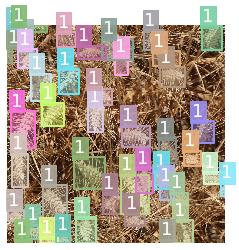

In [26]:
show_record(rtrain[6], bbox=True)

In [41]:
model = FastRCNNModel.load_from_checkpoint(checkpoint_path='lightning_logs/version_17/checkpoints/epoch=1.ckpt', n_class=2)

In [21]:
trainer = Trainer(model)

INFO:lightning:GPU available: True, used: False


In [42]:
#export
def model_device(model): return first(model.parameters()).device

In [48]:
model.eval()
rs = random.choices(rvalid, k=2)
ims = [open_img(o.iinfo.fp) for o in rs]
device = model_device(model)
xs = [im2tensor(o).to(device) for o in ims]
preds = model(xs)
predsr = [r.new(annot=dict(bboxes=[BBox.from_xyxy(*o) for o in p['boxes']])) for r,p in zip(rs,preds)]

In [55]:
pred = preds[0]

In [66]:
def to_np(t): return t.detach().cpu().numpy()

In [92]:
im = ims[0]
bboxes = [BBox.from_xyxy(*to_np(o)) for o in pred['boxes']]
masks = None
labels = None

In [101]:
n = max([len(L(o)) for o in [labels,bboxes,masks]])
colors = (np.random.random((n,3))*0.6+0.4).tolist()

In [105]:
def bbox_polygon(bbox):
    bx, by, bw, bh = bbox.xywh
    poly = np.array([[bx,by], [bx,by+bh], [bx+bw,by+bh], [bx+bw,by]])
    return patches.Polygon(poly)

In [ ]:
def draw_label(ax, x, y, name, color, fontsize=18):
    ax.text(x+1, y-2, name, fontsize=fontsize, color='white', va='bottom',
            bbox=dict(facecolor=color, edgecolor=color, pad=2, alpha=.9))

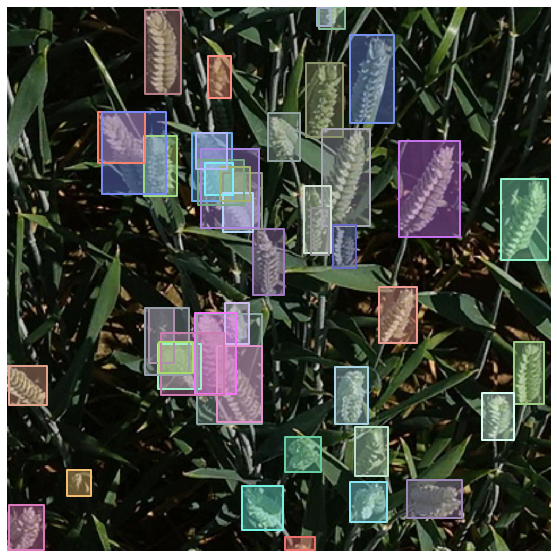

In [106]:
# Sample colors at the end
# colors = []
ax = show_img(im, figsize=(10,10))
polygons,colors = [],[]
for label,bbox,mask in itertools.zip_longest(L(labels),L(bboxes),L(masks)):
    color = (np.random.random(3)*0.6+0.4).tolist()
    colors.append(color)
    if notnone(bbox): polygons.append(bbox_polygon(bbox))
    if notnone(label):
#         name = ann.oid if id2cat is None else id2cat[ann.oid]
        name = label
        if notnone(bbox): x,y = bbox.x,bbox.y
        else: raise ValueError('Can only display labels if bboxes are given')
        draw_label(ax, x=x, y=y, name=name, color=color)

p = PatchCollection(polygons, facecolor=colors, linewidths=0, alpha=0.4)
ax.add_collection(p)
p = PatchCollection(polygons, facecolor='none', edgecolors=colors, linewidths=2)
ax.add_collection(p)

In [ ]:
def show_record(im, id2cat=None, bbox=True, labels=True, fontsize=18, ax=None, **kwargs):
    'From github.com/cocodataset/cocoapi/blob/master/PythonAPI/pycocotools/coco.py#L233'
    height,width,_ = im.shape
    ax = show_img(im, ax=ax, **kwargs)
    ax.set_autoscale_on(False)
    polygons,color = [],[]
    for seg in segs:
    for ann in record.annot:
        c = (np.random.random((1, 3))*0.6+0.4).tolist()[0]
        # Assert both seg and masks are not present, or unify view
        if ann.seg is not None:
            if isinstance(ann.seg, Polygon):
                for seg in ann.seg.pnts:
                    poly = np.array(seg).reshape((int(len(seg)/2), 2))
                    polygons.append(patches.Polygon(poly))
                    color.append(c)
            elif isinstance(ann.seg, RLE):
                if isinstance(ann.seg.counts, list):
#                     rle = mask_utils.frPyObjects([ann.seg.counts], height, width)
                    m = ann.seg.to_mask(height, width).data
                else:
                    raise NotImplementedError
    #                 rle = [ann['segmentation']]
#                 m = mask_utils.decode(rle)
                if ann.iscrowd == 1: color_mask = np.array([2.0,166.0,101.0])/255
                if ann.iscrowd == 0: raise NotImplementedError # TODO: I'm not sure how to handle this case
    #                 color_mask = np.random.random((1, 3)).tolist()[0]
            elif isinstance(ann.seg, MaskFile):
                masks = ann.seg.to_mask(height, width).data
                color_masks = np.random.random((masks.shape[0], 3))
                imgs = np.ones((*masks.shape, 3))
                for img,m,color_mask in zip(imgs,masks,color_masks):
                    for i in range(3):
                        img[:,:,i] = color_mask[i]
                    ax.imshow(np.dstack((img, m*0.5)))
            elif isinstance(ann.seg, Mask):
                m = ann.seg.data
                color_mask = np.random.random(3)
            else: raise ValueError(f'Not supported type: {type(ann.seg)}')
            if isinstance(ann.seg, RLE) or isinstance(ann.seg, Mask):
                img = np.ones( (m.shape[0], m.shape[1], 3) )
                for i in range(3):
                    img[:,:,i] = color_mask[i]
                ax.imshow(np.dstack( (img, m*0.5) ))
        if ann.kpts and type(ann['keypoints']) == list:
            raise NotImplementedError
            # turn skeleton into zero-based index
    #                     sks = np.array(self.loadCats(ann['category_id'])[0]['skeleton'])-1
    #                     kp = np.array(ann['keypoints'])
    #                     x = kp[0::3]
    #                     y = kp[1::3]
    #                     v = kp[2::3]
    #                     for sk in sks:
    #                         if np.all(v[sk]>0):
    #                             plt.plot(x[sk],y[sk], linewidth=3, color=c)
    #                     ax.plot(x[v>0], y[v>0],'o',markersize=8, markerfacecolor=c, markeredgecolor='k',markeredgewidth=2)
    #                     ax.plot(x[v>1], y[v>1],'o',markersize=8, markerfacecolor=c, markeredgecolor=c, markeredgewidth=2)

        if bbox:
            [bx, by, bw, bh] = ann.bbox.xywh
            poly = [[bx, by], [bx, by+bh], [bx+bw, by+bh], [bx+bw, by]]
            np_poly = np.array(poly).reshape((4,2))
            polygons.append(patches.Polygon(np_poly))
            color.append(c)
            name = ann.oid if id2cat is None else id2cat[ann.oid]
            if labels:
                ax.text(bx+1, by-2, name, fontsize=fontsize, color='white', va='bottom',
                        bbox=dict(facecolor=c, edgecolor=c, pad=2, alpha=.9))

    p = PatchCollection(polygons, facecolor=color, linewidths=0, alpha=0.4)
    ax.add_collection(p)
    p = PatchCollection(polygons, facecolor='none', edgecolors=color, linewidths=2)
    ax.add_collection(p)

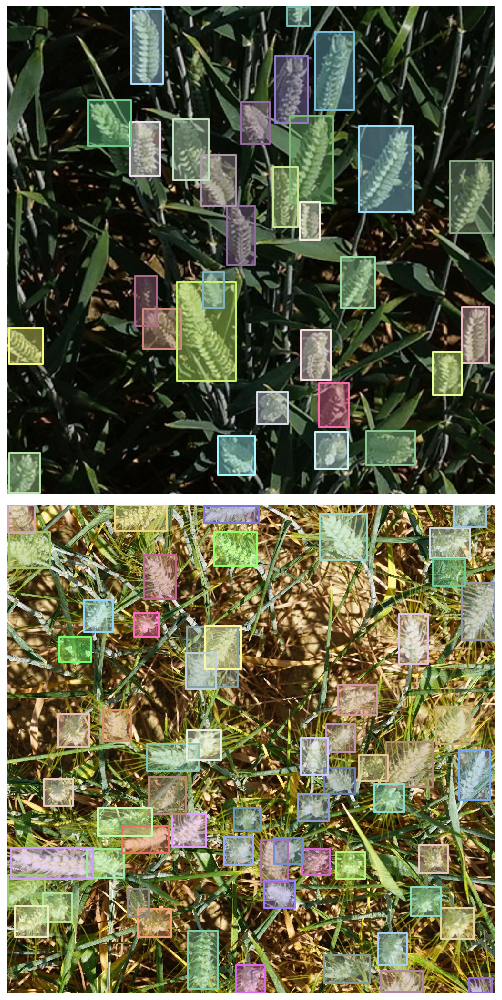

In [49]:
grid(partial(show_record, labels=False), predsr)

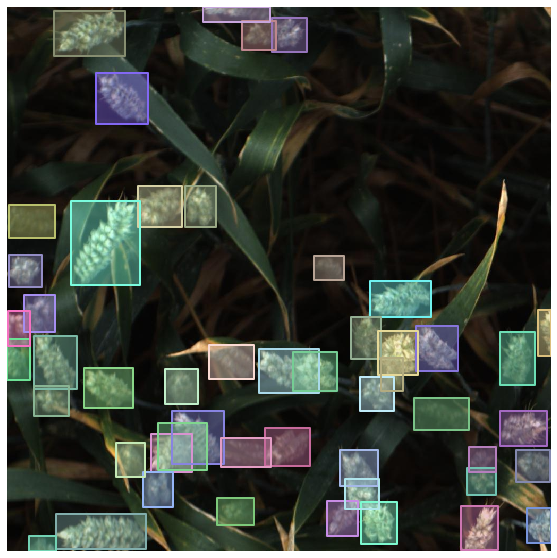

In [46]:
r = random.choice(rvalid)
im = open_img(r.iinfo.fp)
model.eval()
res = model([im2tensor(im)])[0]
r2 = r.new(annot=dict(bboxes=[BBox.from_xyxy(*o) for o in res['boxes']]))
show_record(r2, labels=False, figsize=(10,10))